In [2]:
from multiobject.pytorch import MultiObjectDataLoader, MultiObjectDataset
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Utils

In [2]:
def visualize_dataset(path_to_dataset):
    
    batch_size = 32
    dataset_path = path_to_dataset
    
    train_set = MultiObjectDataset(dataset_path, train=True, split = 1.)
    
    print("Num of Images ", len(train_set))
    
    train_loader = MultiObjectDataLoader(train_set, batch_size=batch_size, shuffle=True)
    
    samples, _ = iter(train_loader).next()
    fig=plt.figure(figsize=(12, 12))
    N_images = 21
    for i in range(1,N_images):
        fig.add_subplot(int(np.sqrt(N_images)) +1 , int(np.sqrt(N_images))+1, i)
        plt.imshow(np.transpose(samples[i], (1,2,0)))
    plt.show()
    
    return None

# dSprites base

In [3]:
#visualize_dataset('generated/dsprites/multi_dsprites_210407_144010.npz')

# Custom

## Test 1

Add customization of :
- output folder through --folder 
- file name through --file 
- number of images generated through -n

Num of Images  64


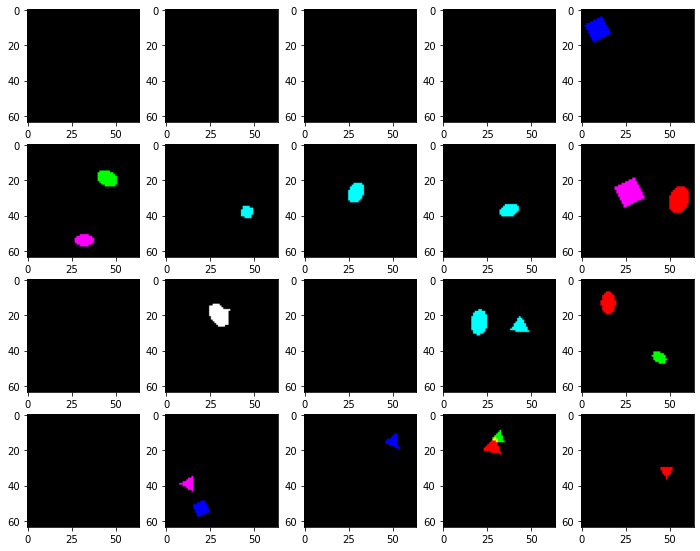

In [4]:
visualize_dataset('generated/custom/multi_dsprites_test_1.npz')

# Test 2

Add customization of :
- patch size through --patch_size 
- frame size through --frame_size
- allow overlap through --overlap

Parameters : patch_size = 64, frame_size = 128

Num of Images  64


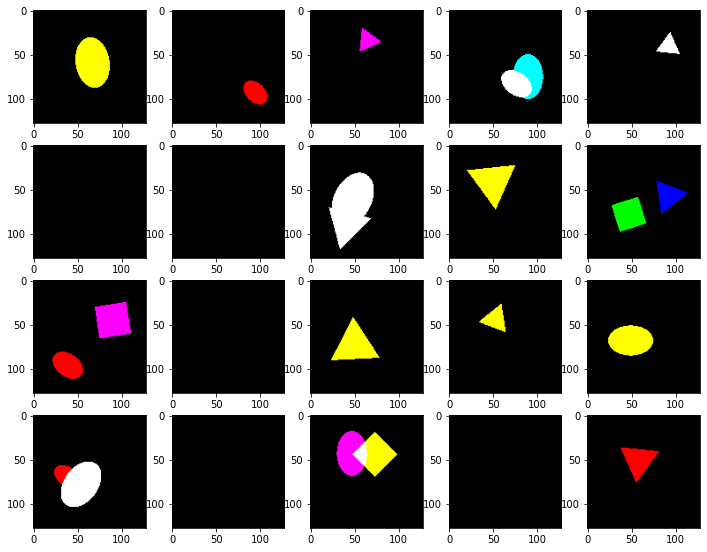

In [5]:
visualize_dataset('generated/custom/multi_dsprites_test_2.npz')

## Test 3

Add customization of :
- placement of objects through -p --placement ('random', 'center', 'xalign', 'yalign') 


Parameters : patch_size = 32, frame_size = 128, placement = yalign

Num of Images  64


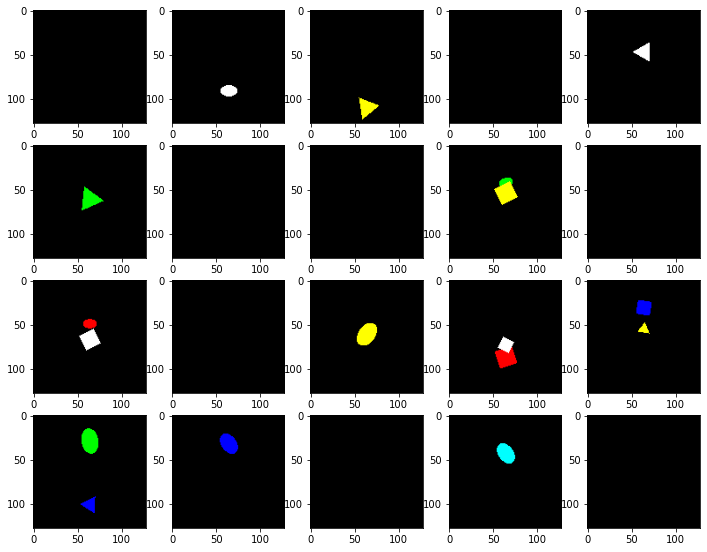

In [6]:
visualize_dataset('generated/custom/multi_dsprites_test_3.npz')

Parameters : patch_size = 32, frame_size = 128, placement = xalign

Num of Images  64


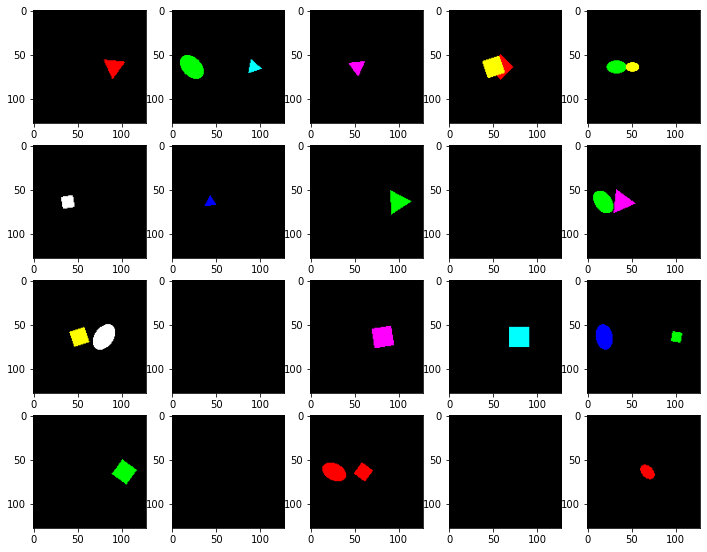

In [7]:
visualize_dataset('generated/custom/multi_dsprites_test_3_1.npz')

In [166]:
!python generate_dataset.py --noise 0

generating sprites...
generating dataset...
num sprites: 5040
done
shape: (64, 256, 256, 3)
saving...
done



100%|##########| 64/64 [00:00<00:00, 297.14it/s]


In [167]:
data_path = 'generated/custom/multi_dsprites_test_4.npz'
data = np.load(data_path, allow_pickle=True)

In [168]:
x = np.asarray(data['x'], dtype=np.float32) / 255
labels = data['labels']

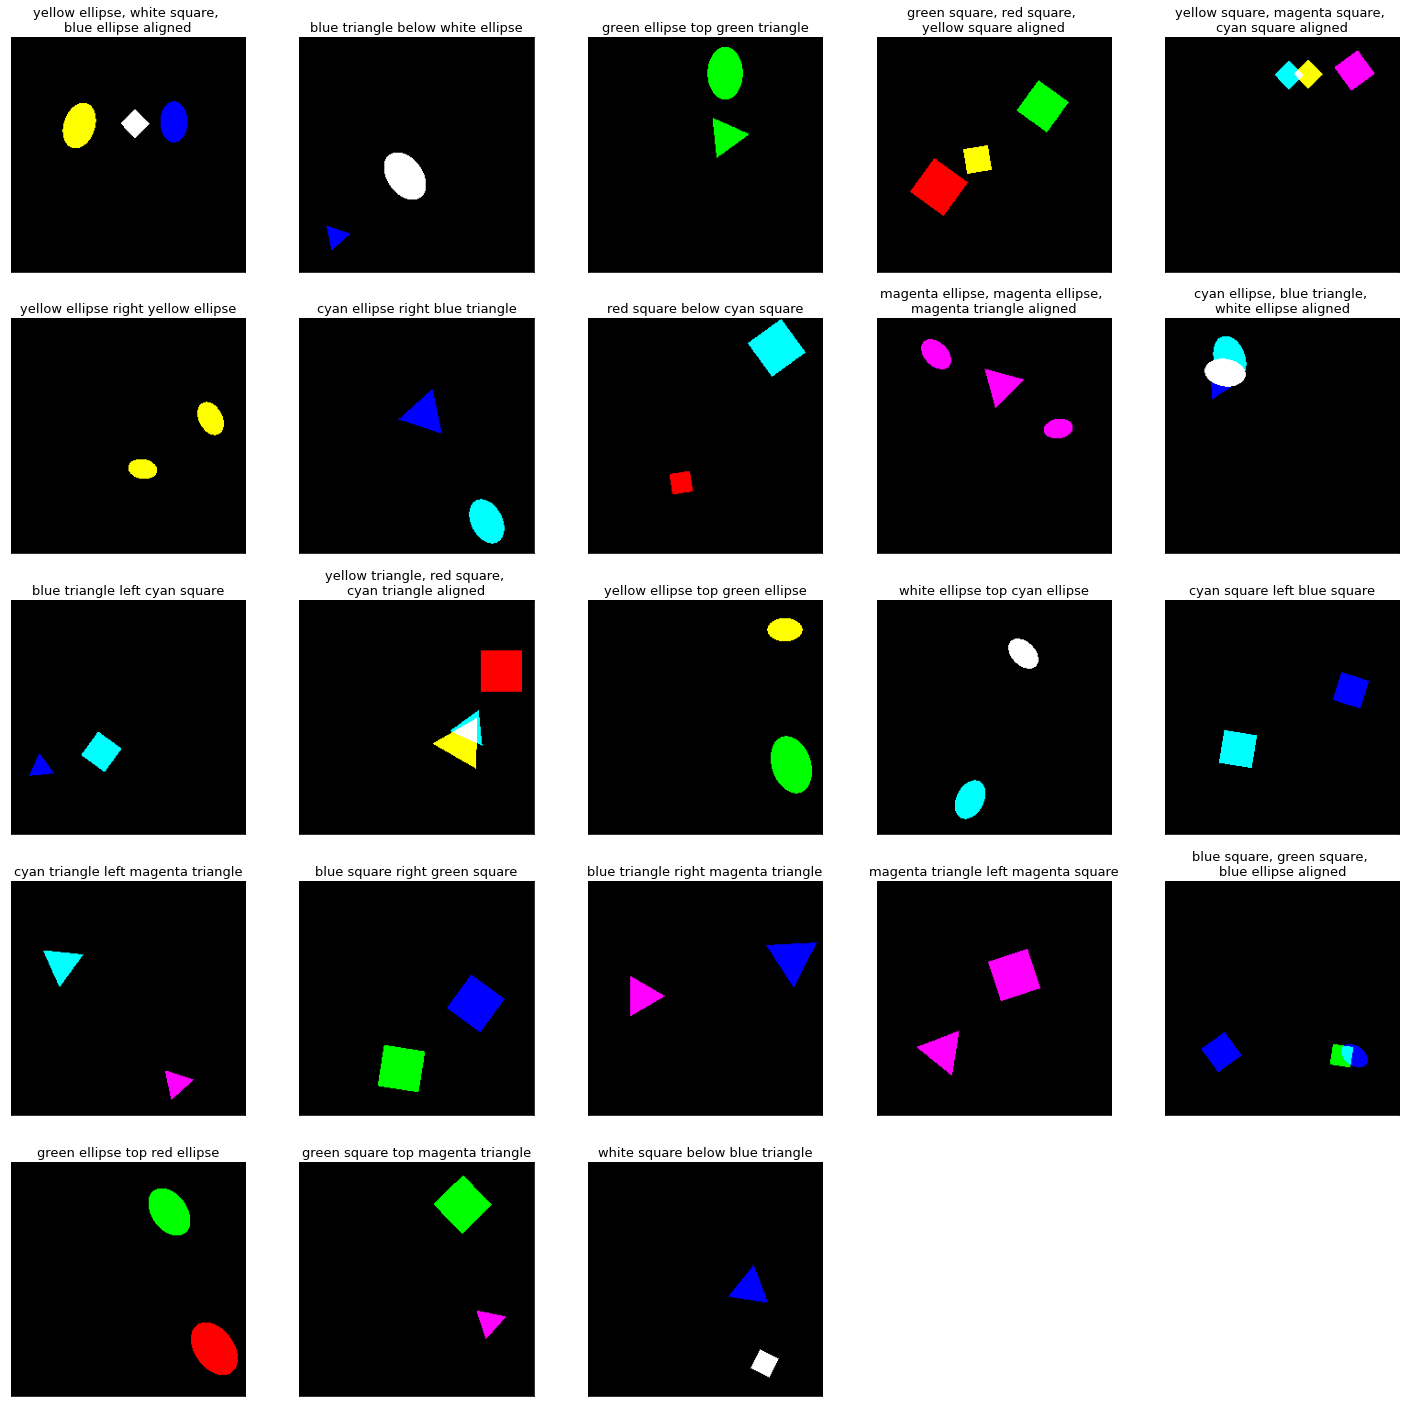

In [169]:
fig=plt.figure(figsize=(25, 25))
N_images = 24
axs = [None]*N_images
for i in range(1,N_images):
    axs[i] = fig.add_subplot(int(np.sqrt(N_images)) +1 , int(np.sqrt(N_images))+1, i)
    axs[i].set_title(labels[i][1], fontdict = {'fontsize': 13})
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    plt.imshow(x[i])
plt.show()

In [131]:
#labels

In [121]:
bool(0)

False